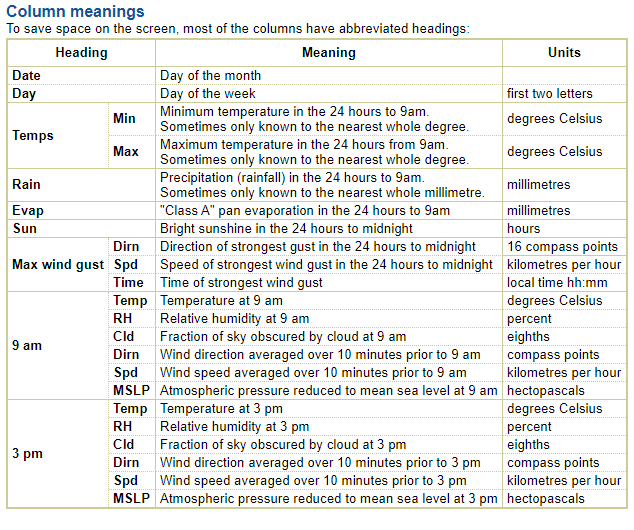


In [65]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Pós-Graduação/Introdução a Ciência de Dados/weatherAUS_V2.csv')

In [66]:
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


#Sumarização dos dados

In [67]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [68]:
#Quantidade de nulos
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [69]:
df.RainTomorrow.replace( {'No':0, 'Yes':1}, inplace=True )
df.drop( 'Date', inplace=True, axis='columns' )

In [70]:
# Versão 1
df_v1 = df.dropna()
df_v1.shape

(56420, 22)

In [71]:
# Versão 2
df_v2 = df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis ='columns').dropna()
df_v2.shape

(112925, 18)

#Enconding nos categoricos

In [72]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow       int64
dtype: object

In [73]:
# retorna os categoricos
df.select_dtypes( include='object').head().columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [74]:
# retorna os numericos
df.select_dtypes(exclude='object').head().columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow'],
      dtype='object')

In [75]:
pd.get_dummies( df_v1 )

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_NorfolkIsland,Location_Nuriootpa,Location_Perth,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,...,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
5939,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
5940,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
5942,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5943,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
5944,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
139109,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
139110,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
139111,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [76]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [77]:
df_v1.Location = le.fit_transform( df_v1.Location )
df_v1.WindGustDir = le.fit_transform( df_v1.WindGustDir )
df_v1.WindDir9am = le.fit_transform( df_v1.WindDir9am )
df_v1.WindDir3pm = le.fit_transform( df_v1.WindDir3pm )
df_v1.RainToday = le.fit_transform( df_v1.RainToday )
df_v1.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
5939,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
5940,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
5942,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
5943,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
5944,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [78]:
df_v2.Location = le.fit_transform( df_v2.Location )
df_v2.WindGustDir = le.fit_transform( df_v2.WindGustDir )
df_v2.WindDir9am = le.fit_transform( df_v2.WindDir9am )
df_v2.WindDir3pm = le.fit_transform( df_v2.WindDir3pm )
df_v2.RainToday = le.fit_transform( df_v2.RainToday )
df_v2.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,1,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,1,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,1,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


# 70% - treino
# 30% - teste

In [79]:
x_v1 = df_v1.drop('RainTomorrow', axis='columns')
x_v2 = df_v2.drop('RainTomorrow', axis='columns') 

y_v1 = df_v1.RainTomorrow
y_v2 = df_v2.RainTomorrow

In [80]:
from sklearn.model_selection import train_test_split

x_v1_train, x_v1_test, y_v1_train, y_v1_test =  train_test_split( x_v1, y_v1, test_size = 0.3, random_state = 12 )
x_v2_train, x_v2_test, y_v2_train, y_v2_test =  train_test_split( x_v2, y_v2, test_size = 0.3, random_state = 12 )

# Classificação

In [81]:
from sklearn.linear_model import LogisticRegression

modelLG_v1 = LogisticRegression()
modelLG_v1.fit(x_v1_train, y_v1_train)
sc_treino1 = modelLG_v1.score( x_v1_train, y_v1_train )
sc_teste1 = modelLG_v1.score( x_v1_test, y_v1_test )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [82]:
print('LG_v1 ', sc_treino1, sc_teste1)

LG_v1  0.8522560388919836 0.8507030603804797


In [83]:
modelLG_v2 = LogisticRegression()
modelLG_v2.fit(x_v2_train, y_v2_train)
sc_treino2 = modelLG_v2.score( x_v2_train, y_v2_train )
sc_teste2 = modelLG_v2.score( x_v2_test, y_v2_test )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [84]:
print('LG_v2 ', sc_treino2, sc_teste2)

LG_v2  0.847192176806204 0.8447369974614795


In [85]:
from sklearn.ensemble import RandomForestClassifier

modelRF_v1 = RandomForestClassifier()
modelRF_v1.fit(x_v1_train, y_v1_train)
sc_treino3 = modelRF_v1.score( x_v1_train, y_v1_train )
sc_teste3 = modelRF_v1.score( x_v1_test, y_v1_test )

In [86]:
print('RF_v1 ', sc_treino3, sc_teste3)

RF_v1  1.0 0.8573791799598252


In [87]:
modelRF_v2 = RandomForestClassifier()
modelRF_v2.fit(x_v2_train, y_v2_train)
sc_treino4 = modelRF_v2.score( x_v2_train, y_v2_train )
sc_teste4 = modelRF_v2.score( x_v2_test, y_v2_test )

In [88]:
print('RF_v2 ', sc_treino4, sc_teste4)

RF_v2  0.9999873492985186 0.8558356455516855


# Comparando os modelos

In [89]:
print('LG_v1 ', sc_treino1, sc_teste1)
print('LG_v2 ', sc_treino2, sc_teste2)
print('RF_v1 ', sc_treino3, sc_teste3)
print('RF_v2 ', sc_treino4, sc_teste4)

LG_v1  0.8522560388919836 0.8507030603804797
LG_v2  0.847192176806204 0.8447369974614795
RF_v1  1.0 0.8573791799598252
RF_v2  0.9999873492985186 0.8558356455516855


# Matriz de confusão

In [90]:
from sklearn.metrics import confusion_matrix

# LG V1 - Validação
y_true = y_v1_test
y_pred = modelLG_v1.predict( x_v1_test )
confusion_matrix( y_true, y_pred )

array([[12423,   710],
       [ 1817,  1976]])

In [91]:
# LG V2 - Validação
y_true = y_v2_test
y_pred = modelLG_v2.predict( x_v2_test )
confusion_matrix( y_true, y_pred )

array([[24968,  1384],
       [ 3876,  3650]])

In [92]:
# RF V1 - Validação
y_true = y_v1_test
y_pred = modelRF_v1.predict( x_v1_test )
confusion_matrix( y_true, y_pred )

array([[12544,   589],
       [ 1825,  1968]])

In [93]:
# RF V1 - Validação
y_true = y_v2_test
y_pred = modelRF_v2.predict( x_v2_test )
confusion_matrix( y_true, y_pred )

array([[25104,  1248],
       [ 3636,  3890]])

# Tratar desbalanceamento de classes

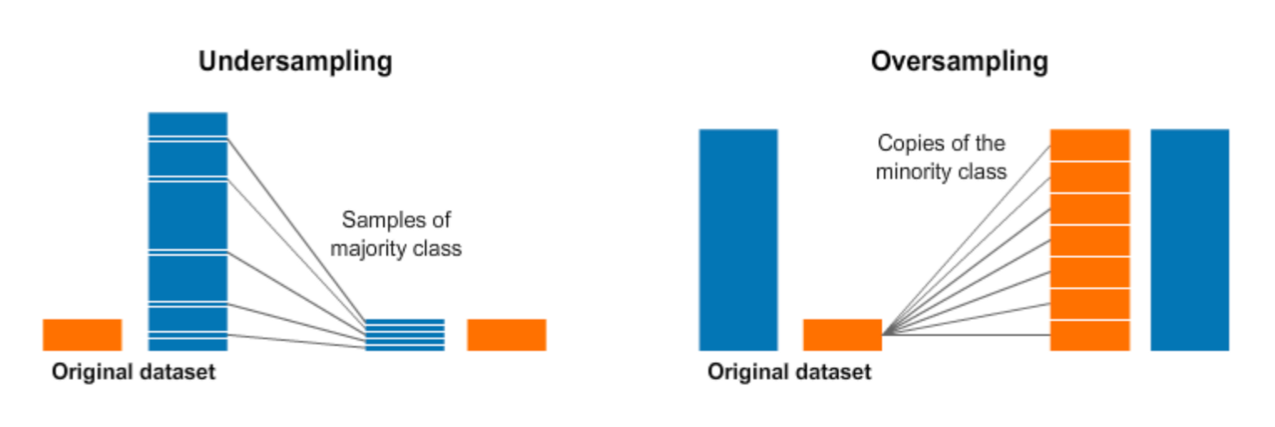

In [94]:
n_nao, n_yes = y_v1.value_counts()

In [95]:
n_yes

12427

# Undersampling

In [99]:
df_no_reduzidos = df_v1[ df_v1.RainTomorrow == 0 ].sample(n=n_yes)
df_no_reduzidos.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
61529,18,14.7,20.5,0.4,7.8,0.0,15,28.0,12,8,7.0,13.0,81.0,62.0,1011.8,1012.0,8.0,8.0,17.5,19.4,0,0
32808,19,9.7,16.3,0.0,3.4,7.8,11,52.0,11,11,20.0,28.0,58.0,43.0,1025.4,1026.0,6.0,4.0,13.4,15.9,0,0
64472,9,8.1,25.6,0.0,7.0,13.5,9,31.0,12,2,15.0,15.0,59.0,38.0,1016.3,1015.2,3.0,5.0,16.5,22.1,0,0
68703,10,1.1,14.0,0.0,0.6,8.3,7,24.0,5,7,6.0,13.0,97.0,50.0,1024.4,1019.8,1.0,1.0,4.6,13.5,0,0
83499,1,10.9,25.0,0.0,11.4,11.0,1,24.0,11,0,2.0,13.0,32.0,43.0,1014.7,1011.7,0.0,1.0,22.4,23.3,0,0


In [97]:
df_no_reduzidos = df_v1[ df_v1.RainTomorrow == 0 ].sample(n=n_yes)
df_no_reduzidos.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
44487,3,11.3,32.3,0.0,9.4,11.4,4,28.0,1,14,4.0,6.0,44.0,17.0,1024.3,1020.7,5.0,2.0,18.2,30.5,0,0
118314,15,21.0,36.4,0.0,15.0,12.0,0,46.0,1,0,20.0,17.0,41.0,16.0,1016.2,1012.5,1.0,1.0,25.7,35.6,0,0
97199,12,5.1,16.2,1.4,0.6,9.1,0,30.0,2,0,11.0,13.0,80.0,63.0,1008.8,1008.7,1.0,1.0,10.1,15.4,1,0
133330,0,20.0,34.9,0.0,8.6,12.6,10,50.0,2,10,9.0,28.0,47.0,19.0,1008.1,1005.7,1.0,4.0,27.6,34.3,0,0
9543,5,16.5,27.3,1.6,1.8,7.5,15,50.0,7,5,17.0,20.0,88.0,59.0,1007.7,1002.1,7.0,1.0,19.1,26.2,1,0


In [98]:
df_no_reduzidos.shape

(12427, 22)

In [100]:
df_yes = df_v1[ df_v1.RainTomorrow == 1 ]
df_under_v1 = pd.concat( [ df_no_reduzidos,  df_yes ], axis=0 )
df_under_v1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
61529,18,14.7,20.5,0.4,7.8,0.0,15,28.0,12,8,7.0,13.0,81.0,62.0,1011.8,1012.0,8.0,8.0,17.5,19.4,0,0
32808,19,9.7,16.3,0.0,3.4,7.8,11,52.0,11,11,20.0,28.0,58.0,43.0,1025.4,1026.0,6.0,4.0,13.4,15.9,0,0
64472,9,8.1,25.6,0.0,7.0,13.5,9,31.0,12,2,15.0,15.0,59.0,38.0,1016.3,1015.2,3.0,5.0,16.5,22.1,0,0
68703,10,1.1,14.0,0.0,0.6,8.3,7,24.0,5,7,6.0,13.0,97.0,50.0,1024.4,1019.8,1.0,1.0,4.6,13.5,0,0
83499,1,10.9,25.0,0.0,11.4,11.0,1,24.0,11,0,2.0,13.0,32.0,43.0,1014.7,1011.7,0.0,1.0,22.4,23.3,0,0


In [101]:
df_under_v1.RainTomorrow.value_counts()

1    12427
0    12427
Name: RainTomorrow, dtype: int64

In [102]:
x_v1 = df_under_v1.drop('RainTomorrow', axis='columns')

y_v1 = df_under_v1.RainTomorrow

x_v1_train, x_v1_test, y_v1_train, y_v1_test =  train_test_split( x_v1, y_v1, test_size = 0.3, random_state = 12 )

In [103]:
modelLG_v1_under = LogisticRegression()
modelLG_v1_under.fit(x_v1_train, y_v1_train)
sc_treino1_under = modelLG_v1_under.score( x_v1_train, y_v1_train )
sc_teste1_under = modelLG_v1_under.score( x_v1_test, y_v1_test )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [104]:
print('LG_v1 under ', sc_treino1_under, sc_teste1_under)

LG_v1 under  0.8007127665689486 0.7906664878637522


In [105]:
# LG V1 - Validação
y_true = y_v1_test
y_pred = modelLG_v1_under.predict( x_v1_test )
confusion_matrix( y_true, y_pred )

array([[3026,  760],
       [ 801, 2870]])

# Oversampling

In [114]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()

In [115]:
x_v1 = df_v1.drop('RainTomorrow', axis='columns')
y_v1 = df_v1.RainTomorrow

x_r_v1, y_r_v1 = smt.fit_sample( x_v1, y_v1  )

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [116]:
import numpy as np

np.bincount(y_r_v1)

array([43993, 43993])

In [117]:
x_v1_train, x_v1_test, y_v1_train, y_v1_test =  train_test_split( x_r_v1, y_r_v1, test_size = 0.3, random_state = 12 )

In [118]:
modelLG_v1_over = LogisticRegression()
modelLG_v1_over.fit(x_v1_train, y_v1_train)
sc_treino1_over = modelLG_v1_over.score( x_v1_train, y_v1_train )
sc_teste1_over = modelLG_v1_over.score( x_v1_test, y_v1_test )

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [119]:
print('LG_v1 over ', sc_treino1_over, sc_teste1_over)

LG_v1 over  0.7959084266926449 0.7981891195635702


In [120]:
# LG V1 - Validação
y_true = y_v1_test
y_pred = modelLG_v1_over.predict( x_v1_test )
confusion_matrix( y_true, y_pred )

array([[10533,  2602],
       [ 2725, 10536]])